In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
from matplotlib import colors
from matplotlib.colors import ListedColormap
from argparse import Namespace
from pymoo.indicators.hv import HV
from pymoo.config import Config
Config.warnings['not_compiled'] = False



In [2]:
conf = !python  parameters.py

In [3]:
configs = eval(conf[0])
configs.et_normalize_coef_cost

100

In [4]:
## ESPECIFIC CONFIGS
configs.name="E99_9"
configs.n_devices=99
configs.n_jobs=9

In [42]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)

In [43]:

df.columns = ["model","sample","time","cost","reward","iTime","iCost"]
df.head()

,model,sample,time,cost,reward,iTime,iCost
0,010,0,166.083328,81.0,-81.0,326.899994,810.0
1,010,1,368.416656,81.0,-81.0,260.800018,810.0
2,010,2,177.666672,81.0,-81.0,332.200012,810.0
3,010,3,367.166656,81.0,-81.0,295.300018,810.0
4,010,4,231.166672,81.0,-81.0,269.799988,810.0


# DRL - average all samples (NOT VALID)

In [175]:
dfmodel = df.groupby("model").agg({"time":mean,"cost":mean})
dfmodel

,time,cost
model,,
010,279.005005,86.279999
100,293.231995,810.000000
19,303.616669,82.680000
28,233.516663,81.080002
37,413.268311,108.540001
46,251.426666,81.000000
55,328.328308,106.879997
64,363.415009,155.619995
73,262.358337,128.699997


In [176]:
print(type(dfmodel))


<class 'pandas.core.frame.DataFrame'>


In [177]:
for i in range(len(dfmodel)):
    print(dfmodel.iloc[i].name)
    print(dfmodel.iloc[i].time)
    

010
279.005
100
293.232
19
303.61667
28
233.51666
37
413.2683
46
251.42667
55
328.3283
64
363.415
73
262.35834
82
362.62698
91
293.232


In [47]:
def getWeithDecomposition(val):
    if len(val)==3:
        if val[0]==0:
            return "(0,1)"
        else:
            return "(1,0)"
    else:
        return "(%s,%s)"%(val[0],val[1])
    

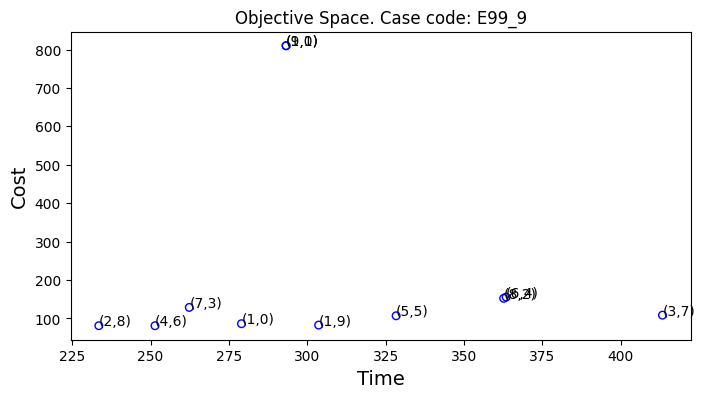

In [48]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(dfmodel.time, dfmodel.cost, s=30, facecolors='none', edgecolors='blue')


for i in range(len(dfmodel)):
    ax.annotate(getWeithDecomposition(dfmodel.iloc[i].name), (dfmodel.iloc[i].time, dfmodel.iloc[i].cost))

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [73]:
avg_pf = np.vstack((dfmodel.time.values,dfmodel.cost.values)).T
avg_pf.shape

(11, 2)

In [74]:
avg_pf

array([[279.005  ,  86.28   ],
       [293.232  , 810.     ],
       [303.61667,  82.68   ],
       [233.51666,  81.08   ],
       [413.2683 , 108.54   ],
       [251.42667,  81.     ],
       [328.3283 , 106.88   ],
       [363.415  , 155.62   ],
       [262.35834, 128.7    ],
       [362.62698, 152.36   ],
       [293.232  , 810.     ]], dtype=float32)

In [75]:
ref_point = np.array([500., 900.])
ind = HV(ref_point=ref_point)
print("HV", ind(avg_pf)) 

HV 218248.42049943237


# DRL one sample

In [107]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)
df.columns = ["model","case","time","cost","reward","iTime","iCost"]
df.head()


,model,case,time,cost,reward,iTime,iCost
0,010,0,166.083328,81.0,-81.0,326.899994,810.0
1,010,1,368.416656,81.0,-81.0,260.800018,810.0
2,010,2,177.666672,81.0,-81.0,332.200012,810.0
3,010,3,367.166656,81.0,-81.0,295.300018,810.0
4,010,4,231.166672,81.0,-81.0,269.799988,810.0


In [111]:
dfDRL = df[df.case==0]
dfDRL

,model,case,time,cost,reward,iTime,iCost
0,010,0,166.083328,81.0,-81.000000,326.899994,810.0
50,19,0,248.666672,81.0,-97.766667,326.899994,810.0
100,28,0,171.250015,81.0,-99.050003,326.899994,810.0
150,37,0,363.916656,145.0,-210.674997,326.899994,810.0
200,46,0,203.916672,81.0,-130.166669,326.899994,810.0
250,55,0,259.916656,114.0,-186.958328,326.899994,810.0
300,64,0,324.416656,190.0,-270.649994,326.899994,810.0
350,73,0,183.000015,97.0,-157.200011,326.899994,810.0
400,82,0,279.499969,178.0,-259.199976,326.899994,810.0
450,91,0,326.899994,810.0,-375.209995,326.899994,810.0


In [112]:
avg_pf = np.vstack((dfDRL.time.values,dfDRL.cost.values)).T

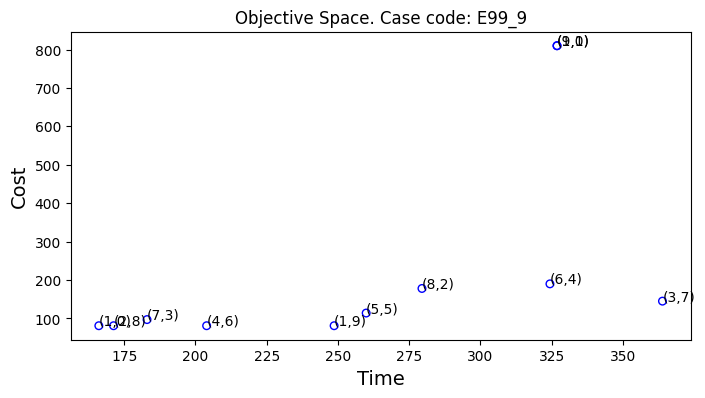

In [113]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(avg_pf[:,0], avg_pf[:,1], s=30, facecolors='none', edgecolors='blue')


for i in range(len(dfmodel)):
    ax.annotate(getWeithDecomposition(dfDRL.iloc[i].model), (avg_pf[i,0], avg_pf[i,1]))

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

# GA

In [80]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)

In [82]:
df.columns = ["case","time","cost","executionTime"]
df.head()

,case,time,cost,executionTime
0,0,748.083313,269.0,67.537391
1,0,767.333313,262.0,67.537391
2,0,728.083313,289.0,67.537391
3,0,726.416626,293.0,67.537391
4,0,736.083313,270.0,67.537391


In [86]:
dfga = df[df.case==0]
dfga

,case,time,cost,executionTime
0,0,748.083313,269.0,67.537391
1,0,767.333313,262.0,67.537391
2,0,728.083313,289.0,67.537391
3,0,726.416626,293.0,67.537391
4,0,736.083313,270.0,67.537391
5,0,856.916626,224.0,67.537391
6,0,732.083313,279.0,67.537391
7,0,713.083313,312.0,67.537391
8,0,801.833313,235.0,67.537391
9,0,723.583374,302.0,67.537391


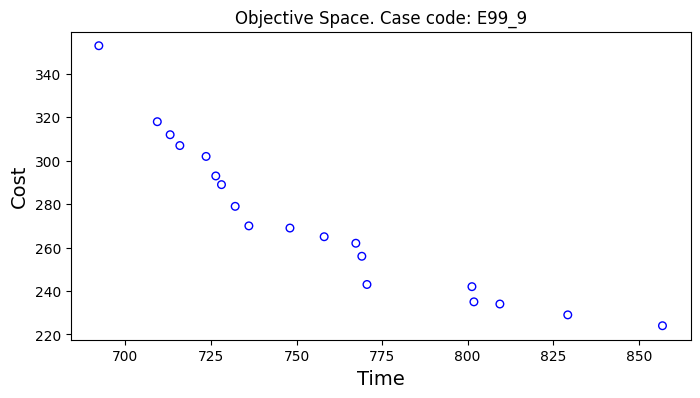

In [87]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(dfga.time, dfga.cost, s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

# GA + DRL

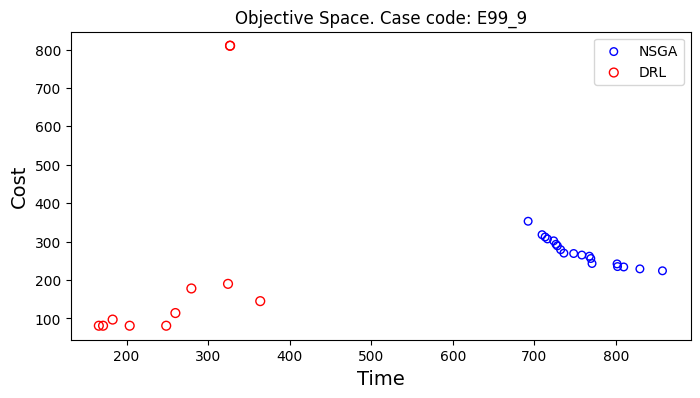

In [122]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(dfga.time, dfga.cost, s=30, facecolors='none', edgecolors='blue',label="NSGA")

ax.scatter(avg_pf[:,0], avg_pf[:,1], s=40, facecolors='none', edgecolors='red',label="DRL")

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.legend()
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [116]:
ga_pf = np.vstack((dfga.time.values,dfga.cost.values)).T

In [117]:
ref_point = np.array([900., 900.])
ind = HV(ref_point=ref_point)
print("H - GA ", ind(ga_pf)) 

H - GA  133672.0859375


In [119]:
print("H - DRL ", ind(avg_pf)) 

H - DRL  601077.7541656494


### Violin plot del PF según pesos del modelo DRL

In [134]:
dtvio = dfDRL.loc[:,["model","time","cost"]]
dtvio["case"]=np.zeros(len(dtvio),dtype=int)
dtvio

,model,time,cost,case
0,010,166.083328,81.0,0
50,19,248.666672,81.0,0
100,28,171.250015,81.0,0
150,37,363.916656,145.0,0
200,46,203.916672,81.0,0
250,55,259.916656,114.0,0
300,64,324.416656,190.0,0
350,73,183.000015,97.0,0
400,82,279.499969,178.0,0
450,91,326.899994,810.0,0


In [135]:
x = list(range(len(dtvio)))

In [169]:
def getWeithDecomposition(val):
    if len(val)==3:
        if val[0]=="0":
            return "(0,1.)"
        else:
            return "(1.,0)"
    else:
        return "(.%s,.%s)"%(val[0],val[1])
    
fticks = np.vectorize(getWeithDecomposition)
ticks = fticks(dtvio.model)
ticks

array(['(0,1.)', '(.1,.9)', '(.2,.8)', '(.3,.7)', '(.4,.6)', '(.5,.5)',
       '(.6,.4)', '(.7,.3)', '(.8,.2)', '(.9,.1)', '(1.,0)'], dtype='<U7')

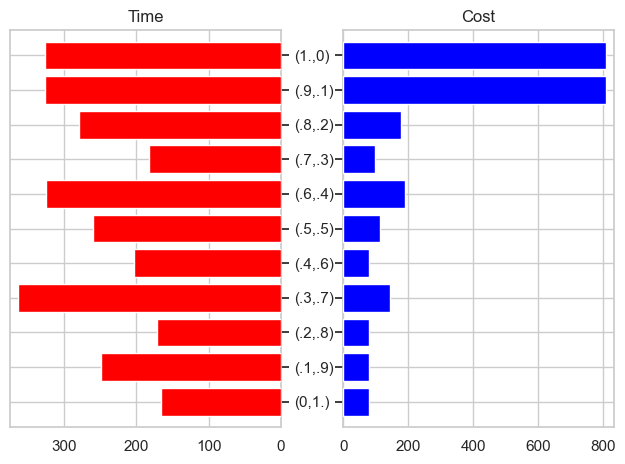

In [174]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, dtvio.time, align='center', color='red', zorder=10)
axes[0].set(title='Time')
axes[1].barh(x, dtvio.cost, align='center', color='blue', zorder=10)
axes[1].set(title='Cost')

axes[0].invert_xaxis()
axes[0].set(yticks=x, yticklabels=ticks)
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()



for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)
plt.show()

In [185]:
dtvio.model

0      010
50      19
100     28
150     37
200     46
250     55
300     64
350     73
400     82
450     91
500    100
Name: model, dtype: object

In [186]:
dfmodel #average DRL all cases
print(dfmodel.index)

Index(['010', '100', '19', '28', '37', '46', '55', '64', '73', '82', '91'], dtype='object', name='model')

In [188]:
dfrindex = dfmodel.reindex(['010', '19', '28', '37', '46', '55', '64', '73', '82', '91', '100'])

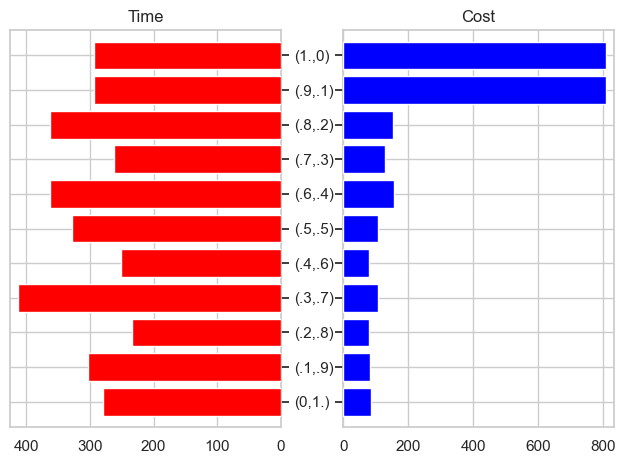

In [189]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, dfrindex.time, align='center', color='red', zorder=10)
axes[0].set(title='Time')
axes[1].barh(x, dfrindex.cost, align='center', color='blue', zorder=10)
axes[1].set(title='Cost')

axes[0].invert_xaxis()
axes[0].set(yticks=x, yticklabels=ticks)
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()



for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)
plt.show()